# Question 1

### Using explicit (forward) Euler method

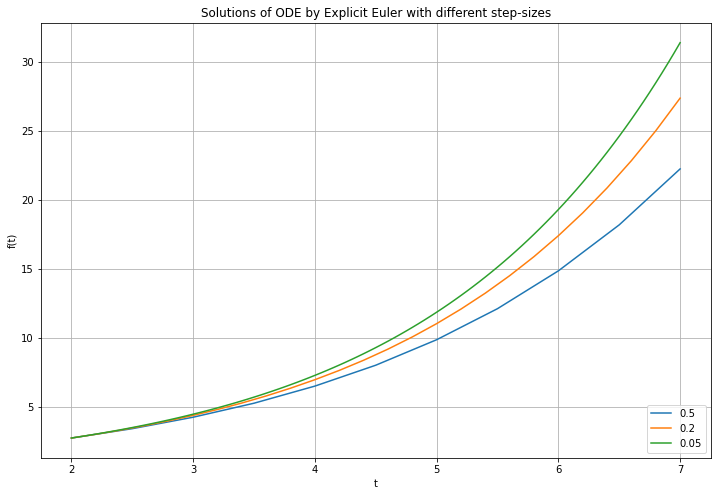

In [1]:
import math

import matplotlib.pyplot as plt
from functionLibrary import fwdEuler

f = lambda x, y: (y*math.log(y))/x

t1, s1 = fwdEuler(f, 2, 7, 0.5, 2.71828)
t2, s2 = fwdEuler(f, 2, 7, 0.2, 2.71828)
t3, s3 = fwdEuler(f, 2, 7, 0.05, 2.71828)

plt.figure(figsize = (12, 8))
plt.plot(t1, s1, label='0.5')
plt.plot(t2, s2, label = '0.2')
plt.plot(t3, s3, label = '0.05')
plt.title('Solutions of ODE by Explicit Euler with different step-sizes')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()


### Using implicit (backward) Euler method

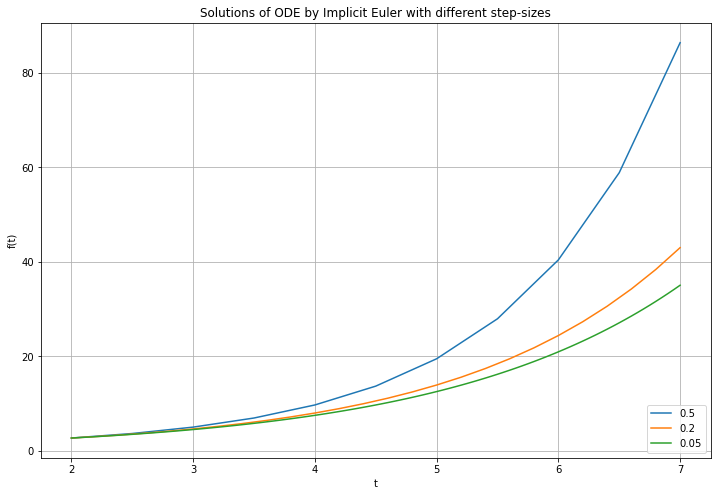

In [2]:
import math
import matplotlib.pyplot as plt 
from functionLibrary import bwdEuler


t1, s1 = bwdEuler(2, 7, 0.5, 2.71828)
t2, s2 = bwdEuler(2, 7, 0.2, 2.71828)
t3, s3 = bwdEuler(2, 7, 0.05, 2.71828)

plt.figure(figsize = (12, 8))
plt.plot(t1, s1, label='0.5')
plt.plot(t2, s2, label = '0.2')
plt.plot(t3, s3, label = '0.05')
plt.title('Solutions of ODE by Implicit Euler with different step-sizes')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### Using Predictor-Corrector method

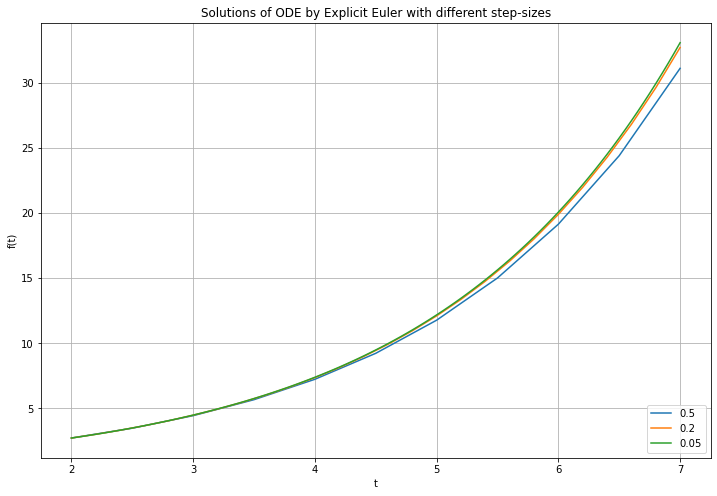

In [3]:
import math
import matplotlib.pyplot as plt
from functionLibrary import predCorr
f = lambda y, x: (y*math.log(y))/x

t1, s1 = predCorr(f, 2, 7, 0.5, 2.71828)
t2, s2 = predCorr(f, 2, 7, 0.2, 2.71828)
t3, s3 = predCorr(f, 2, 7, 0.05, 2.71828)

plt.figure(figsize = (12, 8))
plt.plot(t1, s1, label='0.5')
plt.plot(t2, s2, label = '0.2')
plt.plot(t3, s3, label = '0.05')
plt.title('Solutions of ODE by Explicit Euler with different step-sizes')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()



# Question 2

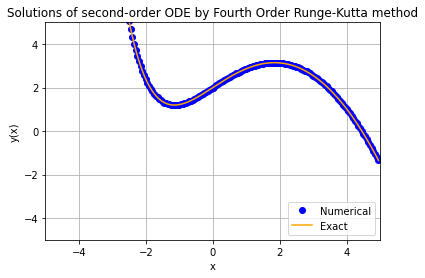

In [4]:
import math
import matplotlib.pyplot as plt
from functionLibrary import rk4_secondOrder

def F1(y, u, x):
    return u

def F2(y, u, x):
    return (1-u-x)

    
x_list, y_list = rk4_secondOrder(F1, F2, 0, 5.0, 0.05, 2, 1)
x_back, y_back = rk4_secondOrder(F1, F2, 0, -5, -0.05, 2, 1)

x_min = -5.0
x_max = 5.0
step_size = 0.05
xExact = []
yExact = []

for i in range(math.ceil((x_max-x_min)/step_size)):
    xExact.append(x_min)
    x_min = x_min + step_size
for i in range(len(xExact)):
    yExact.append(2.0*xExact[i] - (1/2)*xExact[i]**2 + (math.exp(-xExact[i])) + 1.0)



plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.plot(x_list, y_list, 'o', color = 'blue', label = 'Numerical')
plt.plot(x_back, y_back, 'o', color = 'blue')
plt.plot(xExact, yExact, color = 'orange', label = 'Exact')
plt.title('Solutions of second-order ODE by Fourth Order Runge-Kutta method')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

For the ground state, we obtain the following curve: 


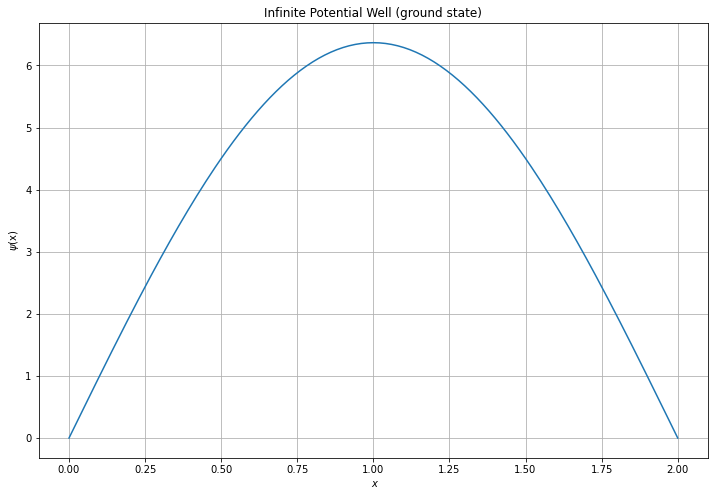

In [5]:
import math
import matplotlib.pyplot as plt
from functionLibrary import runge_kutta
from functionLibrary import lagrange_interpolation
from functionLibrary import shooting_method

# def shooting_method(d2ydx2, dydx, x0, y0, xf, yf, z_guess1, z_guess2, step_size, tol=1e-6):
# this is func for d2y/dt2 =func
def d2ydt2(t, y, z):
    return -((math.pi)**2)*y/4
# z = dy/dt
def dydt(t, y, z):
    return z

# Defining boundary values
x_initial = 0
x_final = 2
y_initial = 0
y_final = 0

x, y, z = shooting_method(d2ydt2, dydt, x_initial, y_initial, x_final, y_final, 10, 100, step_size=0.01)

print("For the ground state, we obtain the following curve: ")
plt.figure(figsize = (12, 8))
plt.plot(x,y)
plt.xlabel(" $x$")
plt.ylabel("$\psi$(x)")
plt.title("Infinite Potential Well (ground state)")
plt.grid()
plt.show()

For the first excited state, we obtain the following curve: 


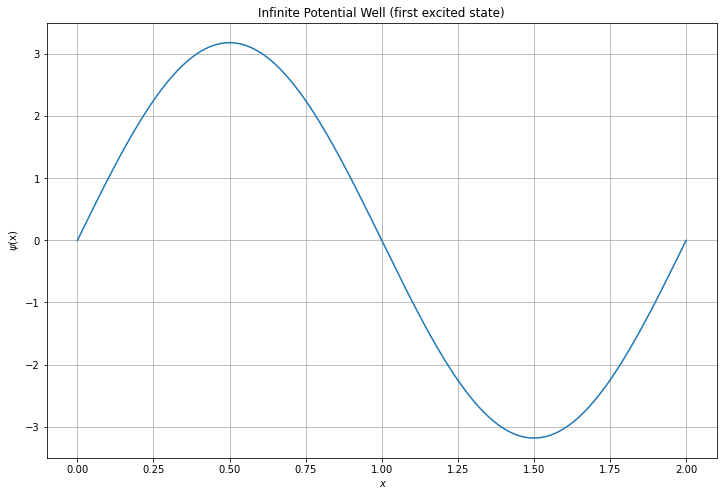

In [6]:
import math
import matplotlib.pyplot as plt
from functionLibrary import runge_kutta
from functionLibrary import lagrange_interpolation
from functionLibrary import shooting_method

# def shooting_method(d2ydx2, dydx, x0, y0, xf, yf, z_guess1, z_guess2, step_size, tol=1e-6):
# this is func for d2y/dt2 =func
def d2ydt2(t, y, z):
    return -((math.pi)**2)*y
# z = dy/dt
def dydt(t, y, z):
    return z

# Defining boundary values
x_initial = 0
x_final = 2
y_initial = 0
y_final = 0

x, y, z = shooting_method(d2ydt2, dydt, x_initial, y_initial, x_final, y_final, 10, 100, step_size=0.01)

print("For the first excited state, we obtain the following curve: ")
plt.figure(figsize = (12, 8))
plt.plot(x,y)
plt.xlabel(" $x$")
plt.ylabel("$\psi$(x)")
plt.title("Infinite Potential Well (first excited state)")
plt.grid()
plt.show()